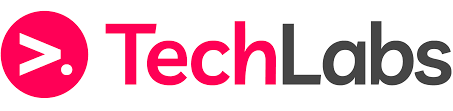
# TechLabs “Digital Shaper Program” in Copenhagen, fall semester 2023.
# -  Project "LunchBox App" by:
- Kul Raj Sharma
- Marianna Mykhalenych
- Nutthapat Mingmalairak
- Silvia Vidal Melgosa


### 1. Thesis Statement: <BR>
> The LunchBox app assists parents in preparing nutrition-conscious and well-balanced lunch box meals for their children, recognizing the critical impact of daily nutrition on a child's well-being and optimal development.

### 2. Introduction: <BR>
> In Denmark, thousands of parents go through the daily routine of preparing a lunch box (madpakke) for their children. The task is apparently simple. However, the reality is far more complex, as many parents struggle with it due to concerns and nagging questions like: Does the nutrient content of the food I pack align with my kid’s nutritional requirements? Is it diverse enough? Their worries are indeed justified, because the food consumed during a child’s growing period is crucial for its optimal psychological and physical development.

> Our goal is to address this challenge by developing an app, the LunchBox app, that calculates the nutritional needs of each child based on age, gender and physical activity. This app will then compare these needs with the nutrients contained in the lunchbox food content. With our advanced approach, parents will be able to ensure that the lunch meets their child's energy and nutrient requirements, promoting optimal growth and health.



### 3. Data description: <BR>

> To start the development of the LunchBox app, we first focused on searching for the appropriate data. An essential part of our app involves having the nutrient composition of foods and comparing them with the specific nutritional requirements for children. As we wanted to help parents in Denmark, we used data from the Frida database (https://www.food.dtu.dk/english/about-us/facilities-and-infrastructure/food-data-database-on-nutrients-in-food), which contains comprehensive information about energy and nutrient content for over 1.000 foods on the Danish market. Food data version 5.1, 2023, was made available by the National Food Institute, Technical University of Denmark (frida.fooddata.dk). For the children and adolescents nutritional needs, we used the European Food Safety Authority nutrient dietary reference values, which are published on DRV Finder (https://multimedia.efsa.europa.eu/drvs/index.htm#). The values are tailored to age, gender and physical activity, being a robust foundation for our app. Both datasets are available in xlsx format.

### 4. Data manipulation:
> To effectively analyze the datasets, it is important to ensure that the data obtained from various sources is well-formatted and suitable for further analysis.

Import Python libraries and datasets

In [ ]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# clone and mount datasets from github
!git clone https://github.com/nutindy/Techlabs-CPH-23-24-Lunch-Box-App-
%cd Techlabs-CPH-23-24-Lunch-Box-App-

# import datasets into dataframes
df_nutrient = pd.read_excel('Frida_5.1_November_2023.xlsx', 'Data_Normalised') # DTU Food Nutrient Contents / Food Nutrients
df_food_group = pd.read_excel('Frida_5.1_November_2023.xlsx', 'FoodGroup') # DTU Food Nutrient Contents / Food Group
df_dietary = pd.read_excel('efsa dietary reference values for the EU_all.xlsx') # EFSA Dietart Reference Values for the EU

df_nutrient

Cloning into 'Techlabs-CPH-23-24-Lunch-Box-App-'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 13.64 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Techlabs-CPH-23-24-Lunch-Box-App-


,FoodID,FødevareNavn,FoodName,ParameterID,ParameterNavn,ParameterName,SortKey,ResVal,Min,Max,Median,NumberOfDeterminations,Source,SourceFood
0,1,"Jordbær, rå","Strawberry, raw",137,Energi (kJ),Energy (kJ),1010,161.953590,NaN,NaN,NaN,NaN,1003,NaN
1,1,"Jordbær, rå","Strawberry, raw",316,"Energi, deklaration (kJ)","Energy, labelling (kJ)",1020,161.953590,NaN,NaN,NaN,NaN,1003,NaN
2,1,"Jordbær, rå","Strawberry, raw",356,Energi (kcal),Energy (kcal),1030,38.457949,NaN,NaN,NaN,NaN,1003,NaN
3,1,"Jordbær, rå","Strawberry, raw",359,"Energi, deklaration (kcal)","Energy, labelling (kcal)",1040,38.457949,NaN,NaN,NaN,NaN,1003,NaN
4,1,"Jordbær, rå","Strawberry, raw",218,Protein,Protein,1110,0.659856,0.5,1.0,NaN,26.0,"1073, 1825, 2179",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121279,1859,"Mango, rå","Mango, raw",400,Hydroxyprolin,Hydroxyproline,12290,0.000000,NaN,50.0,NaN,8.0,2179,NaN
121280,1859,"Mango, rå","Mango, raw",423,Ornitin,Ornithine,12300,0.000000,NaN,50.0,NaN,8.0,2179,NaN
121281,1859,"Mango, rå","Mango, raw",116,Cholin,Choline,13022,7.600000,NaN,NaN,NaN,1.0,2187,NaN
121282,1859,"Mango, rå","Mango, raw",252,Svind,Waste,20010,42.250000,32.0,61.0,40.5,8.0,2179,NaN


# **Clean the data**

In [ ]:
# clean the data in df_nutrient
# reset the data to prevent error
df_nutrient = pd.read_excel('Frida_5.1_November_2023.xlsx', 'Data_Normalised') # DTU Food Nutrient Contents / Food Nutrients

# drop unused columsFødevareNavn
droplist_nutrient = ["FødevareNavn", "ParameterNavn", "Min", "Max", "Median", "NumberOfDeterminations", "SourceFood"]
df_nutrient.drop(columns=droplist_nutrient, axis=1, inplace=True)

# replace 'NULL' with NaN for further usage
df_nutrient['Source'].replace("NULL", np.nan, inplace=True)

# adjust 'ResVal' format
df_nutrient['ResVal'] = df_nutrient['ResVal'].astype(float)
df_nutrient['ResVal'] = df_nutrient['ResVal'].apply(lambda x: round(x, 2))
df_nutrient

KeyboardInterrupt: 

Filter top common foods and nutrition types

In [ ]:
# filter 55 selected top common foods and nutrition types
selected_foods_id = [
    600, 388, 606, 17, 614, 26, 801, 14, 451, 20, 1811, 1813, 1807, 1296, 1225,
    1666, 1668, 1787, 1671, 1521, 148, 727, 598, 825, 1652, 1553, 597, 1795,
    1236, 1093, 1615, 1622, 1624, 1631, 1648, 1099, 1043, 1057, 12, 1305, 35,
    647, 616, 1848, 1858, 1859, 1, 2, 3, 9, 70, 1573, 1575, 1591, 432
]

# filter top common nutritions that related to children health
nutrition_types = [
    "Energy (kJ)", "Protein", "Carbohydrate by difference", "Vitamin A", "Vitamin D",
    "Vitamin C", "Fat", "Potassium", "Calcium", "Magnesium", "Iron", "Iodine",
    "Cellulose", "High molecular weight soluble dietary fibre"
]

# filter selected_foods_id and nutrition_types
filt = (df_nutrient['FoodID'].isin(selected_foods_id)) & (df_nutrient['ParameterName'].isin(nutrition_types))
df_nutrient_filt = df_nutrient.loc[filt]
df_nutrient_filt

Clean the data from the dietary reference

In [ ]:
# clean the data in df_dietary
# reset the data to prvent error
df_dietary = pd.read_excel('efsa dietary reference values for the EU_all.xlsx') # EFSA Dietart Reference Values for the EU

# clear NA, NA., ND to NaN
df_dietary.replace(re.compile(r'(NA.?\s?)|(ND.?\s?)'), np.nan, inplace=True)
df_dietary

In [ ]:
# reset the data to prevent error
# df_dietary = pd.read_excel('efsa dietary reference values for the EU_all.xlsx') # EFSA Dietart Reference Values for the EU

# filter dietary types to the most related to children health
dietary_types = [
    "Calcium",
    "Dietary fibre",
    "Energy",
    "Iodine",
    "Magnesium",
    "Potassium",
    "Protein",
    "Total fat",
    "Vitamin A",
    "Vitamin C",
    "Vitamin D",
    "Total carbohydrates",
    "Iron"
]

# split units to another colums
df_dietary['PAL'] = df_dietary['Age'].str.extract('(\d+\.\d+)')
df_dietary['Age'] = df_dietary['Age'].str.extract('([\d*]+[\syears])')
df_dietary['AI Unit'] = df_dietary['AI'].str.extract('[^ ]+([\D]+)')
df_dietary['AI'] = df_dietary['AI'].str.extract('([-+]?\d*\.?\d+)')
df_dietary['AR Unit'] = df_dietary['AR'].str.extract('[^ ]+([\D]+)')
df_dietary['AR'] = df_dietary['AR'].str.extract('([-+]?\d*\.?\d+)')
df_dietary['PRI Unit'] = df_dietary['PRI'].str.extract('[^ ]+([\D]+)')
df_dietary['PRI'] = df_dietary['PRI'].str.extract('([-+]?\d*\.?\d+)')
df_dietary['RI Unit'] = df_dietary['RI'].str.extract('[^ ]+([\D]+)')
df_dietary['RI'] = df_dietary['RI'].str.extract('([-+]?\d*\.?\d+)')
df_dietary['UL Unit'] = df_dietary['UL'].str.extract('[^ ]+([\D]+)')
df_dietary['UL'] = df_dietary['UL'].str.extract('([-+]?\d*\.?\d+)')

# filter the top dietary that realated to df_nutrient
# filter only children in 1-17 years old and sort the data
filt = (df_dietary['Target population'] == "Children") & (df_dietary['Nutrient'].isin(dietary_types))
df_dietary_filt = df_dietary.loc[filt]
df_dietary_filt = df_dietary_filt[["Category", "Nutrient", "Target population", "Age", "PAL", "Gender", "AI", "AI Unit", "AR", "AR Unit", "PRI", "PRI Unit", "RI", "RI Unit", "UL", "UL Unit", "Safe and adequate intake" ]]
df_dietary_filt

# **As we changed the data structure/unit conversion for data visualization in Power BI, we will change the database to google sheets that we prepared for convenience**:


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tabulate import tabulate

# import the parameters (units) from google sheet
parameters = 'https://docs.google.com/spreadsheets/d/1QkFM3dc4Tie0Lel6RTu9jNzQfI5F6JWKXxndcAKGzFs/export?format=xlsx'

# Updated Dietary Requirements
df_dietary_new = pd.read_excel(parameters, 'Dietary Requirements')

# Food Group
df_food_group = pd.read_excel(parameters, 'Food Group')

# Food Items
df_food_items = pd.read_excel(parameters, 'Food Items')

# Food Category
df_food_category = pd.read_excel(parameters, 'Food Category')

# Food nutrition calculated by serving size
df_calculated = pd.read_excel(parameters, 'Calculated by Serving Size')

# Parameter Unit Conversion
df_parameters = pd.read_excel(parameters, 'Parameter')

# Food Value 100g
df_food_100 = pd.read_excel(parameters, 'Value 100g')

**Creating the LunchBox app by Python**

In [3]:
# Create Children Profile
class Children:
  def __init__(self, age, gender, activity_level):
    self.age = age
    self.gender = gender
    self.activity_level = activity_level

def create_user_profile():
    age = int(input("Enter your child age (4-17): "))
    gender = input("Enter your child gender (Male/Female): ")
    activity_level = input("Enter your child activity level (Less active/Active): ")

    global Ch1
    Ch1 = Children(age, gender, activity_level)
    print('Your child are', Ch1.gender,', ages' , Ch1.age, 'years old, and', Ch1.activity_level,'.' )

create_user_profile()

Enter your child age (4-17): 5
Enter your child gender (Male/Female): Male
Enter your child activity level (Less active/Active): Active
Your child are Male , ages 5 years old, and Active .


In [4]:
# Finding dietary requirement that match the profile
filt = (df_dietary_new['Age'] == Ch1.age) & (df_dietary_new['Gender'] == Ch1.gender) & (df_dietary_new['Physical Activity'] == Ch1.activity_level)
df_dietary_new_filt = df_dietary_new.loc[filt]
df_dietary_new_filt

energy_per_meal = df_dietary_new_filt['Energy(KJ/meal)'].sum()
carb_per_meal = df_dietary_new_filt['Carbohydrate(g/meal)'].sum()
fats_per_meal = df_dietary_new_filt['Fats(g/meal)'].sum()
protein_per_meal = df_dietary_new_filt['Protein(g/meal)'].sum()

print('The nutrients amount your child should take for the lunch, Energy(kJ/meal):', energy_per_meal, ' Carbohydrate(g/meal):', carb_per_meal, ' Fats(g/meal):', fats_per_meal, ' Protein(g/meal):', protein_per_meal)

The nutrients amount your child should take for the lunch, Energy(kJ/meal): 2880  Carbohydrate(g/meal): 86.23  Fats(g/meal): 21.01  Protein(g/meal): 38.8


In [13]:
# User input the food items for the meal
foods = []
df_food_table = pd.merge(df_food_items, df_food_group, on="Food Group ID", how="outer", validate="many_to_one")

# Table Headers
headers = ['Food ID', 'Food Names', 'Food Group', 'Approximate Serving Size (grams)']

# Print the table
print(tabulate(df_food_table[['Food ID', 'Food Names', 'Food Group', 'Approximate Serving Size (grams)']].sort_values(by='Food Group'), headers=headers, tablefmt='grid'))

def get_user_input():
    while True:
        foods_list = df_food_items['Food ID'].values.tolist()
        food_id = input("Enter the Food ID for you kids (type 'done' to finish): ")
        if food_id == 'done':
          break
        else :
          food_id = int(food_id)
          foods.append(food_id)
          print(foods)

    return

get_user_input()

filt_food = (df_calculated['Food ID'].isin(foods))
df_food_items_filt = df_food_items[filt_food]
print('Your child meal contains of:')
df_food_items_filt[['Food Names', 'Approximate Serving Size (grams)']]

+----+-----------+------------------------------------------------------------+-------------------------------------+------------------------------------+
|    |   Food ID | Food Names                                                 | Food Group                          |   Approximate Serving Size (grams) |
+====+===========+============================================================+=====================================+====================================+
| 28 |      1795 | Beef, entrecote/rib eye, raw                               | Beef                                |                                 50 |
+----+-----------+------------------------------------------------------------+-------------------------------------+------------------------------------+
| 53 |      1575 | Cookies, oat flakes, industrially produced                 | Biscuits and cookies                |                                 25 |
+----+-----------+----------------------------------------------------

KeyboardInterrupt: Interrupted by user

In [10]:
# Calculate the Energy, Protien, Carb, Fat of the Food
df_nutrient_filt = df_calculated[filt_food]

def calculate_nutrition():
    global sum_energy
    sum_energy = df_nutrient_filt['Energy (kJ)'].sum()
    global sum_protein
    sum_protein = df_nutrient_filt['Protein (g)'].sum()
    global sum_carb
    sum_carb = df_nutrient_filt['Carbohydrate by difference (g)'].sum()
    global sum_fats
    sum_fats = df_nutrient_filt['Fat (g)'].sum()

calculate_nutrition()

In [11]:
# Compare with dietary requirements
def compare_with_dietary_requirements():
    # Energy
    if energy_per_meal > 1.05*sum_energy :
      print('Your meal has only', round(sum_energy, 2), 'kJ.','You need ', round(energy_per_meal - sum_energy, 2), 'kJ more for you child lunch.')
    elif energy_per_meal < 0.95*sum_energy :
      print('Your meal has', round(sum_energy, 2), 'kJ.','You need to reduce', round(abs(energy_per_meal - sum_energy), 2), 'kJ for you child lunch.')
    else :
      print('The lunch box energy level matches your child needs' )

    # Protein
    if protein_per_meal > 1.05*sum_protein :
      print('Your meal has only', round(sum_protein, 2), 'g of protein.','You need ', round(protein_per_meal - sum_protein, 2), 'g of protein more for you child lunch.')
    elif protein_per_meal < 0.95*sum_protein :
      print('Your meal has', round(sum_protein, 2), 'g of protein.','You need to reduce', round(abs(protein_per_meal - sum_protein), 2), 'g of protein for you child lunch.')
    else :
      print('The lunch box protein level matches your child needs' )

    # Carbohydrate
    if carb_per_meal > 1.05*sum_carb :
      print('Your meal has only', round(sum_carb, 2), 'g of carbohydrate.','You need ', round(carb_per_meal - sum_carb, 2), 'g of carbohydrate more for you child lunch')
    elif carb_per_meal < 0.95*sum_carb :
      print('Your meal has', round(sum_carb, 2), 'g of carbohydrate.','You need to reduce', round(abs(carb_per_meal - sum_carb),2), 'g of carbohydrate for you child lunch')
    else :
      print('The lunch box carbohydrate level match your child needs' )

    # Fats
    if fats_per_meal > 1.05*sum_fats :
      print('Your meal has only', round(sum_fats, 2), 'g of fats.','You need ', round(fats_per_meal - sum_fats, 2), 'g of fats more for you child lunch.')
    elif fats_per_meal < 0.95*sum_fats :
      print('Your meal has', round(sum_fats, 2), 'g of fats.','You need to reduce', round(abs(fats_per_meal - sum_fats)), 'g of fats for you child lunch.')
    else :
      print('The lunch box fats level matches your child needs' )

    # Table Headers
    headers = ['Nutrient', 'Status', 'Actual (g)', 'Difference (g)']

    # Table Rows
    rows = [
        ['Energy', 'Low' if energy_per_meal > 1.05 * sum_energy else 'High' if energy_per_meal < 0.95 * sum_energy else 'Match', round(sum_energy, 2), round(energy_per_meal - sum_energy, 2)],
        ['Protein', 'Low' if protein_per_meal > 1.05 * sum_protein else 'High' if protein_per_meal < 0.95 * sum_protein else 'Match', round(sum_protein, 2), round(protein_per_meal - sum_protein, 2)],
        ['Carbohydrate', 'Low' if carb_per_meal > 1.05 * sum_carb else 'High' if carb_per_meal < 0.95 * sum_carb else 'Match', round(sum_carb, 2), round(carb_per_meal - sum_carb, 2)],
        ['Fats', 'Low' if fats_per_meal > 1.05 * sum_fats else 'High' if fats_per_meal < 0.95 * sum_fats else 'Match', round(sum_fats, 2), round(fats_per_meal - sum_fats, 2)]
    ]

    # Print the table
    print(tabulate(rows, headers=headers, tablefmt='grid'))

compare_with_dietary_requirements()

Your meal has only 900.75 kJ. You need  1979.25 kJ more for you child lunch.
Your meal has only 3.0 g of protein. You need  35.8 g of protein more for you child lunch.
Your meal has only 27.9 g of carbohydrate. You need  58.33 g of carbohydrate more for you child lunch
Your meal has only 12.12 g of fats. You need  8.89 g of fats more for you child lunch.
+--------------+----------+--------------+------------------+
| Nutrient     | Status   |   Actual (g) |   Difference (g) |
+==============+==========+==============+==================+
| Energy       | Low      |       900.75 |          1979.25 |
+--------------+----------+--------------+------------------+
| Protein      | Low      |         3    |            35.8  |
+--------------+----------+--------------+------------------+
| Carbohydrate | Low      |        27.9  |            58.33 |
+--------------+----------+--------------+------------------+
| Fats         | Low      |        12.12 |             8.89 |
+--------------+-------

### 5. Project Results: <BR>
> The culmination of our efforts is the creation of a fully functional LunchBox app prototype. Therefore, we provided a solution for the challenging task faced by parents in preparing an adequate nutritious lunch meal for their children. User input data - i.e. age, gender and physical activity level - serves as the basis to extract the four dietary reference values (energy, carbohydrates, proteins, and fats) specific to the user's population. These values are the basis to assess the lunch box nutrient content, which is executed by the coding shown above.

> In summary, our prototype combines data from population-specific recommendations with meal-specific nutritional information, ensuring a well-informed meal creation process in real time. Users can also view the macronutrient content to assure a balanced ratio of carbohydrates, protein and fat.

> In future versions of the LunchBox app, we plan to incorporate features such as meal history tracking (allowing assessment of a well-balanced diet), accommodating food allergies, and enabling registration of multiple children. We will also expand the food item collection (from 55 to >1000 food items) and include micronutrients (vitamins and minerals) in the dietary reference values.


### 6. Conclusion & Learning: <BR>
> Achieving the goal of this project was a collaborative effort. Our weekly meetings (either in person or online) played an essential role in steering decision-making, defining the app's objectives, prioritizing features for the prototype, and defining our data curation approach. To go through these challenges, discussion and brainstorming has been key to advance. We defined important factors, such as approximate serving size per each selected food (in grams) and the percentage of daily food intake corresponding to lunch (set at 40%).

> Our team's cultural background and academic studies are very diverse, which resulted in different ideas and methodologies that greatly enriched our problem-solving strategies. On top of that, we also had fun working together. At the start of the course our coding skills varied, for some of us starting at zero. However, while working on the project we made sure we all were on the same page in comprehending how data was processed. At the end of the course, we all feel that we have acquired coding skills and can now successfully analyse data using Python.


### 7. The project team: <BR>

*   **Kul Raj Sharma**: data analysis and visualisation, front end app design. Data Science track. [LinkedIn](https://www.linkedin.com/in/kulraj/)
*   **Marianna Mykhalenych**: data analysis and curator. Data Science track. [LinkedIn](https://www.linkedin.com/in/marianna-mykhalenych/)

*   **Nutthapat Mingmalairak**: programming and data analysis. Data Science track. [LinkedIn](https://www.linkedin.com/in/nutthapatm/)
*   **Silvia Vidal Melgosa**: data analysis and validation. Data Science track. [LinkedIn](https://www.linkedin.com/in/silvia-vidal-melgosa-4a1a0322a/)



